## Two Sum
This is a classic problem for computational efficiency.

"Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order." [Source](https://leetcode.com/problems/two-sum/description/)

## Classic Brute Force Solution
This function below uses nested for loops to check for possible solutions. 

In [1]:
def two_sum_brute(nums, target):
    count = 0
    for i in range(len(nums)):
        for j in range(i + 1, len(nums)):
            if nums[i] + nums[j] == target:
                return [i, j]

nums = [4, 5, 10, 11, 7, 16, 12, 6, 2, 17, 11, 15]
target = 7
print(two_sum_brute(nums, target)) 

[1, 8]


## Optimized Solution
This solution uses a [hash map](https://leetcode.com/problems/two-sum/description/). 

In [2]:
def two_sum_on(nums, target):
    seen = {}  # Maps number to its index
    for i, num in enumerate(nums):
        complement = target - num  
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i
        
nums = [4, 5, 10, 11, 7, 16, 12, 6, 2, 17, 11, 15]
target = 7
print(two_sum_on(nums, target))         

[1, 8]


## Benchmark Trial
Now we run both functions and test how long it takes to run.

In [3]:
import time
import random

# Brute force solution
def two_sum_brute(nums, target):
    for i in range(len(nums)):
        for j in range(i + 1, len(nums)):
            if nums[i] + nums[j] == target:
                return [i, j]

# Optimized hash map solution
def two_sum_on(nums, target):
    seen = {}  # Maps number to its index
    for i, num in enumerate(nums):
        complement = target - num  
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i

# Generate a test case with guarteed solution
def generate_test_case(length=10000):
        nums = random.sample(range(-10**9, 10**9), length)
        # Inject a guarteed solution
        idx1, idx2 = random.sample(range(length), 2)
        target = nums[idx1] + nums[idx2]
        return nums, target

#Benchmark function
def benchmark():
    nums, target = generate_test_case()

    print(f"Target: {target}")
    print("Running two_sum_on (optimized)...")
    start = time.time()
    result_on = two_sum_on(nums, target)
    end = time.time()
    print(f"Result: {result_on}, Time: {end-start:.6f} seconds\n")

    print("Runnning two_sum_brute (brute force)...")
    if len(nums) > 50000:
        print("Skipping brute force on large input to avoid long runtime.")

    else:
        start = time.time()
        result_brute = two_sum_brute(nums, target)
        end = time.time()
        print(f"Result: {result_brute}, Time: {end-start:.6f} seconds\n")

#Run benchmark
benchmark()


Target: 1212793486
Running two_sum_on (optimized)...
Result: [7728, 9605], Time: 0.002409 seconds

Runnning two_sum_brute (brute force)...
Result: [7728, 9605], Time: 4.083867 seconds



## Trail Series
Now we run a series of trials of different sizes to see the tradeoffs between computational speed and memory usage. 


Running trials for input size 100...

Running trials for input size 500...

Running trials for input size 1000...

Running trials for input size 3000...

Running trials for input size 5000...

Running trials for input size 10000...


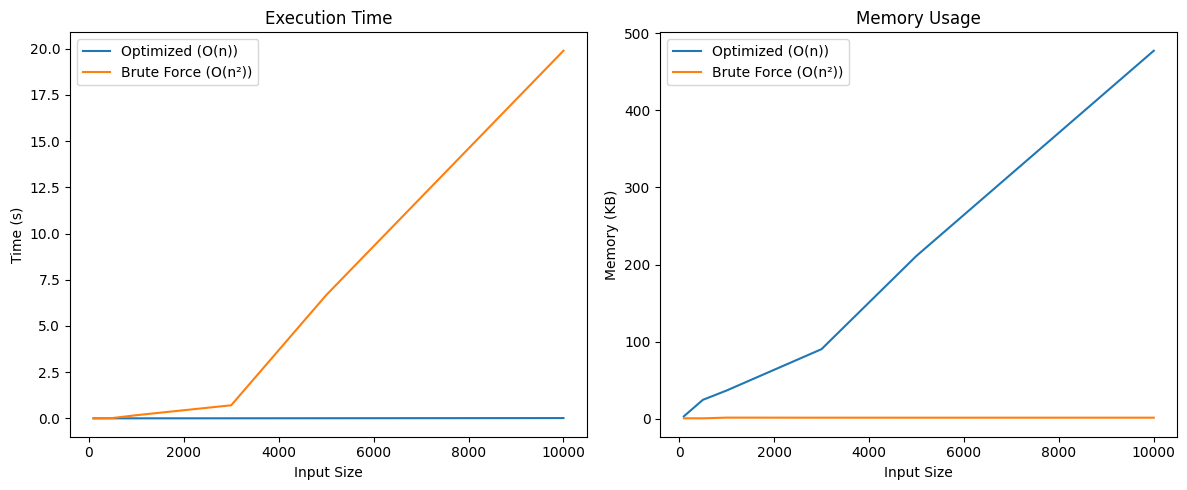

In [4]:
import time
import random
import tracemalloc
import matplotlib.pyplot as plt

# Brute force solution
def two_sum_brute(nums, target):
    for i in range(len(nums)):
        for j in range(i + 1, len(nums)):
            if nums[i] + nums[j] == target:
                return [i, j]

# Optimized hash map solution
def two_sum_on(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i

# Generate a test case with guaranteed solution
def generate_test_case(length):
    nums = random.sample(range(-10**9, 10**9), length)
    idx1, idx2 = random.sample(range(length), 2)
    target = nums[idx1] + nums[idx2]
    return nums, target

# Measure time and memory
def measure(func, nums, target):
    tracemalloc.start()
    start_time = time.perf_counter()
    result = func(nums, target)
    end_time = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return {
        "time": end_time - start_time,
        "memory": peak / 1024,  # Convert to KB
        "result": result
    }

# Benchmark over multiple sizes
def run_benchmark(trials=3, sizes=[100, 500, 1000, 3000, 5000, 10000]):
    on_times, brute_times = [], []
    on_memories, brute_memories = [], []

    for size in sizes:
        print(f"\nRunning trials for input size {size}...")

        total_on_time = total_on_memory = 0
        total_brute_time = total_brute_memory = 0

        for _ in range(trials):
            nums, target = generate_test_case(size)

            on_metrics = measure(two_sum_on, nums, target)
            total_on_time += on_metrics["time"]
            total_on_memory += on_metrics["memory"]

        if size <= 10000:
            brute_metrics = measure(two_sum_brute, nums, target)
            total_brute_time += brute_metrics["time"]
            total_brute_memory += brute_metrics["memory"]
        else:
            brute_metrics = None  # just for consistency

        # Averages
        on_times.append(total_on_time / trials)
        on_memories.append(total_on_memory / trials)

        if size <= 10000:
            brute_times.append(total_brute_time / trials)
            brute_memories.append(total_brute_memory / trials)
        else:
            brute_times.append(None)
            brute_memories.append(None)

    return sizes, on_times, brute_times, on_memories, brute_memories

# Plotting
def plot_results(sizes, on_times, brute_times, on_mem, brute_mem):
    plt.figure(figsize=(12, 5))

    # Time Plot
    plt.subplot(1, 2, 1)
    plt.plot(sizes, on_times, label='Optimized (O(n))')
    plt.plot(sizes[:len(brute_times)], brute_times, label='Brute Force (O(n²))')
    plt.xlabel('Input Size')
    plt.ylabel('Time (s)')
    plt.title('Execution Time')
    plt.legend()

    # Memory Plot
    plt.subplot(1, 2, 2)
    plt.plot(sizes, on_mem, label='Optimized (O(n))')
    plt.plot(sizes[:len(brute_mem)], brute_mem, label='Brute Force (O(n²))')
    plt.xlabel('Input Size')
    plt.ylabel('Memory (KB)')
    plt.title('Memory Usage')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run everything
sizes, on_times, brute_times, on_mem, brute_mem = run_benchmark()
plot_results(sizes, on_times, brute_times, on_mem, brute_mem)